In [69]:
import pandas as pd
import numpy as np
import spacy
from tqdm import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from matplotalt import show_with_alt, generate_alt_text

nlp = spacy.load("en_core_web_sm")

In [42]:
#doc = nlp(text)
#tokens = [token.text for token in doc]
vistext_alt_texts_df = pd.read_json("./vistext_eval/vistext_id_to_combined_captions.jsonl", lines=True, orient="records")
gallery_alt_texts_df = pd.read_json("./matplotlib_gallery/mpl_gallery_combined_captions.jsonl", lines=True, orient="records")
vistext_dict = defaultdict(list)
gallery_dict = defaultdict(list)
for col in vistext_alt_texts_df.columns[1:]:
    for img_descs in vistext_alt_texts_df[col]:
        if img_descs:
            vistext_dict[col].extend(img_descs)
for col in gallery_alt_texts_df.columns[1:]:
    for img_descs in gallery_alt_texts_df[col]:
        if img_descs:
            gallery_dict[col].append(img_descs)

In [44]:
def get_alt_tok_lens(alt_type_to_texts):
    alt_lengths = defaultdict(list)
    for alt_type, alt_texts in alt_type_to_texts.items():
        for alt_text in tqdm(alt_texts):
            alt_tokens = [token.text for token in nlp(alt_text)]
            alt_lengths[alt_type].append(len(alt_tokens))
    return alt_lengths

vistext_alt_lengths = get_alt_tok_lens(vistext_dict)
gallery_alt_lengths = get_alt_tok_lens(gallery_dict)

100%|██████████| 201/201 [00:04<00:00, 41.30it/s]


Mean vistext alt lengths:
human: 90.00866141732284
heuristic: 92.80045351473923
gpt-4-turbo-L4: 159.62529274004683
gpt-4-turbo-alt-L4: 155.19700460829492
gpt-4-turbo-table-L4: 161.4664351851852
gpt-4-turbo-L3: 165.48979591836735
gpt-4-turbo-alt-L3: 165.2338251986379
gpt-4-turbo-table-L3: 174.4971623155505
gpt-4-turbo-table-alt-L3: 173.05074971164936

Mean vistext alt lengths:
heuristic: 138.85572139303483
gpt-4-turbo-L4-300: 189.83582089552237
gpt-4-turbo-alt-L4-300: 192.46268656716418

A figure with 2 subplots.

 subplot 1: a boxplot titled 'vistext alt text lengths'. The x-axis ranges from 0 to 300 using a linear scale and the y-axis ranges from human to gpt-4-turbo-table-alt-l3 using a categorical scale. Boxplot human has a median of 87.0, an interquartile range of 30, and 20 outliers along the y-axis. Boxplot heuristic has a median of 91.0, an interquartile range of 17, and 10 outliers along the y-axis. Boxplot gpt-4-turbo-l4 has a median of 155.0, an interquartile range of 35, and

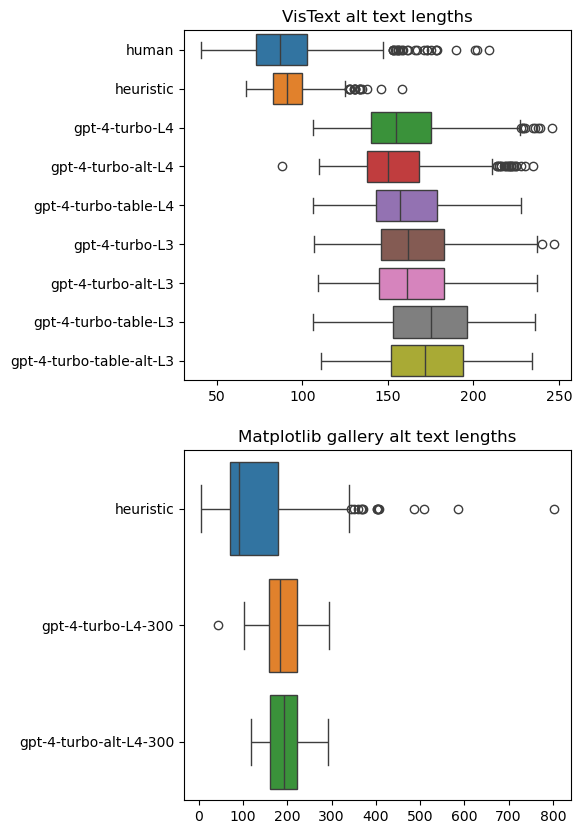

In [76]:
print("Mean vistext alt lengths:")
for alt_type, alt_lengths in vistext_alt_lengths.items():
    print(f"{alt_type}: {np.mean(alt_lengths)}")
print()
print("Mean vistext alt lengths:")
for alt_type, alt_lengths in gallery_alt_lengths.items():
    print(f"{alt_type}: {np.mean(alt_lengths)}")

fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5, 10))
axs = axs.flatten()
sns.boxplot(vistext_alt_lengths, ax=axs[0], orient="h")
sns.boxplot(gallery_alt_lengths, ax=axs[1], orient="h")
axs[0].set_title("VisText alt text lengths")
axs[1].set_title("Matplotlib gallery alt text lengths")
print()
print(generate_alt_text())